# Working With Strings In Pandas

### 1. Introduction


In the previous mission, we learned how to use the  `apply()`,  `map()`, and  `applymap()`  methods to apply a function to a series. While we could certainly use these methods to clean strings in columns, pandas has built in many vectorized string methods that can perform these tasks quicker and with less keystrokes.

We introduced some of these methods already in the  [Pandas Fundamentals course](https://www.dataquest.io/m/293/data-cleaning-basics)  when we learned the following data cleaning tasks:

-   Cleaning column names
-   Extracting values from the start of strings
-   Extracting values from the end of strings

In this mission, we'll learn a couple other string cleaning tasks such as:

-   Finding specific strings or substrings in columns
-   Extracting substrings from unstructured data
-   Removing strings or substrings from a series

As we learn these tasks, we'll also work to build intuition around how these string methods operate so that you can explore methods we haven't explicitly covered on your own.

We'll work with the 2015 World Happiness Report again  _and_  additional economic data from the World Bank. You can find the data set  [here](https://www.kaggle.com/worldbank/world-development-indicators/version/2). Here's a preview of the data set:



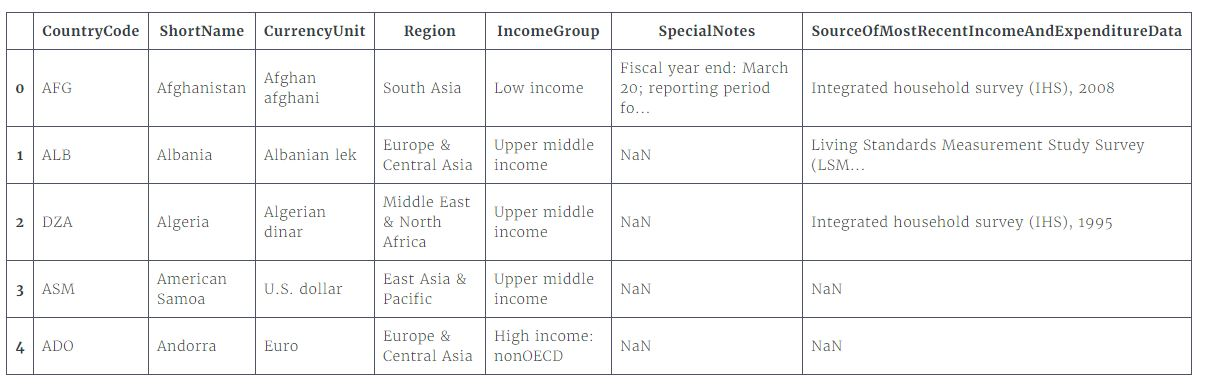

Below are descriptions for the columns we'll be working with:

-   `ShortName`  - Name of the country
-   `Region`  - The region the country belongs to
-   `IncomeGroup`  - The income group the country belongs to, based on Gross National Income (GNI) per capita
-   `CurrencyUnit`  - Name of country's currency
-   `SourceOfMostRecentIncomeAndExpenditureData`  - The name of the survey used to collect the income and expenditure data
-   `SpecialNotes`  - Contains any miscellaneous notes about the data

To start, let's read the data sets into pandas and combine them.


Instructions

We've already read World_Happiness_2015.csv into a dataframe called happiness2015 and World_dev.csv into a dataframe called world_dev.

Use the pd.merge() function to combine happiness2015 and world_dev. Save the resulting dataframe to merged. As a reminder, you can use the following syntax to combine the dataframes: pd.merge(left=df1, right=df2, how='left', left_on='left_df_Column_Name', right_on='right_df_Column_Name').
Set the left_on parameter to the Country column from happiness2015 and the right_on parameter to the ShortName column from world_dev.
Use the DataFrame.rename() method to rename the SourceOfMostRecentIncomeAndExpenditureData column in merged to IESurvey (because we don't want to keep typing that long name!).
We've already saved the mapping to a dictionary named col_renaming.
Make sure to set the axis parameter to 1.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Instructions**

We've already read  `World_Happiness_2015.csv`  into a dataframe called  `happiness2015`  and  `World_dev.csv`  into a dataframe called  `world_dev`.

-   Use the  `pd.merge()`  function to combine  `happiness2015`  and  `world_dev`. Save the resulting dataframe to  `merged`. As a reminder, you can use the following syntax to combine the dataframes:  `pd.merge(left=df1, right=df2, how='left', left_on='left_df_Column_Name', right_on='right_df_Column_Name')`.
    -   Set the  `left_on`  parameter to the  `Country`  column from  `happiness2015`  and the  `right_on`  parameter to the  `ShortName`  column from  `world_dev`.
-   Use the  [`DataFrame.rename()`  method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)  to rename the  `SourceOfMostRecentIncomeAndExpenditureData`  column in  `merged`  to  `IESurvey`  (because we don't want to keep typing that long name!).
    -   We've already saved the mapping to a dictionary named  `col_renaming`.
    -   Make sure to set the  `axis`  parameter to 1.


In [5]:
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [4]:
world_dev = pd.read_csv("World_dev.csv")
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [7]:
merged = pd.merge(left=happiness2015, right=world_dev, left_on="Country", right_on="ShortName", how='left')

In [9]:
merged = merged.rename(col_renaming, axis=1)

In [10]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


### 2. Using Apply to Transform Strings 

**Instructions**

-   Write a function called  `extract_last_word`  with the following criteria:
    -   The function should accept one parameter called  `element`.
    -   Use the  `string.split()`  method to split the object into a list. First convert  `element`  to a string as follows:  `str(element)`.
    -   Return the last word of the list.
-   Use the  `Series.apply()`  method to apply the function to the  `CurrencyUnit`  column. Save the result to  `merged['Currency Apply']`.
-   Use the  `Series.head()`  method to print the first five rows in  `merged['Currency Apply']`.


In [16]:
def extract_last_word(element):
    elt = str(element).split()
    return elt[-1]

merged["Currency Apply"] = merged["CurrencyUnit"].apply(extract_last_word)
merged["Currency Apply"].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

### 3. Vectorized String Methods Overview

**Instructions**

-   Use the  `Series.str.split()`  method to split the  `CurrencyUnit`  column into a list of words and then use the  `Series.str.get()`  method to select just the last word. Assign the result to  `merged['Currency Vectorized']`.
-   Use the  `Series.head()`  method to print the first five rows in  `merged['Currency Vectorized']`.


In [18]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

### 4. Exploring Missing Values with Vectorized String Methods

**Instructions**

-   Use the  `Series.str.len()`  method to return the length of each element in the  `CurrencyUnit`  column. Assign the result to  `lengths`.
-   Use the  `Series.value_counts()`  method to return the count of unique values in  `lengths`. Set the  `dropna`  parameter to False so  `NaN`s are counted, too. Assign the result to  `value_counts`.
    -   If  `value_counts`  contains  `NaN`s, it means the  `Series.str.len()`  method  _excluded_  them and didn't treat them as strings.


In [26]:
lengths = merged["CurrencyUnit"].str.len()
value_counts = lengths.value_counts(dropna=False)

In [27]:
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

### 5. Finding Specific Words in Strings

**Instructions**

We've already saved the regex to a variable called  `pattern`. The brackets,  `[]`, indicate that either "national accounts" or "National accounts" should produce a match.

-   Use the  [`Series.str.contains()`  method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)  to search for  `pattern`  in the  `SpecialNotes`  column. Assign the result to  `national_accounts`.
-   Use the  `Series.head()`  method to print the first five rows in  `national_accounts`.


In [29]:
pattern = r"[Nn]ational accounts"

In [33]:
national_accounts = merged["SpecialNotes"].str.contains(pattern)
print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


In [36]:
national_accounts.value_counts(dropna=False)

True     65
True     54
False    39
Name: SpecialNotes, dtype: int64

### 6. Finding Specific Words in Strings Continued

**Instructions**


-   Use the  `Series.str.contains()`  method to search for  `pattern`  in the  `SpecialNotes`  column again. This time, also pass in the  `na`  parameter and set it to False. Assign the result to  `national_accounts`.
-   Use  `national_accounts`  to index  `merged`, so that only rows that contain "national accounts" or "National accounts" in the  `SpecialNotes`  column are returned. Assign the result to  `merged_national_accounts`.
-   Use the  `DataFrame.head()`  method to print the first five rows in  `merged_national_accounts`.


In [37]:
national_accounts = merged["SpecialNotes"].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


### 7. Extracting Substrings from a Series

**Instructions**

-   Create a regular expression that will match years and assign it to the variable  `pattern`. Note: we've already set up the  `pattern`  variable. Insert your answer inside the parantheses:  `"(your_answer)"`.
-   Use  `pattern`  and the  `Series.str.extract()`  method to extract years from the  `SpecialNotes`  column. Assign the resulting Series to  `years`


In [48]:
pattern = r"([1-2][0-9]{3})"
years = merged["SpecialNotes"].str.extract(pattern)

In [51]:
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


### 8. Extracting Substrings from a Series Continued

**Instructions**

-   Use  `pattern`  and the  `Series.str.extract()`  method to extract years from the  `SpecialNotes`  column again, but this time, set the  `expand`  parameter to  `True`  to return the results as a dataframe. Assign the resulting dataframe to  `years`.


In [52]:
pattern = r"([1-2][0-9]{3})"
years = merged["SpecialNotes"].str.extract(pattern, expand=True)

In [53]:
years.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


### 9. Extracting All Matches of a Pattern from a Series

In [ ]:
merged = merged.set_index('Country')

**Instructions**

We've already set the  `Country`  column as the index and saved the regular expression used to extract years in the  `pattern`  variable.

-   Use the  `Series.str.extractall()`  method to extract all of the years in the  `IESurvey`. Assign the result to  `years`.
-   Use the  `Series.value_counts()`  method to create a list of the unique years, along with the count. Assign the result to  `value_counts`. Print  `value_counts`.


In [67]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged["IESurvey"].str.extractall(pattern)
value_counts = years['Years'].value_counts()
value_counts

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2003     1
1992     1
2000     1
1999     1
1998     1
2002     1
2006     1
1995     1
Name: Years, dtype: int64

### 10. Extracting More Than One Group of Patterns from a Series

**Instructions**

We've already created a regular expression that extracts the pattern "yyyy/yy" and saved it to a variable called  `pattern`. Notice that we didn't enclose  `/?`  in parantheses so that the resulting dataframe will only contain a  `First_Year`  and  `Second_Year`  column.

-   Use the  `Series.str.extractall()`  method to extract  `pattern`  from the  `IESurvey`  column. Assign the result to  `years`.
-   Use vectorized slicing to extract the first two numbers from the  `First_Year`  column in  `years`  (For example, extract "20" from "2000"). Assign the result to  `first_two_year`.
-   Add  `first_two_year`  to the  `Second_Year`  column in  `years`, so that  `Second_Year`  contains the full year (ex: "2000"). Assign the result to  `years['Second_Year']`.


In [73]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[1-9]{2})?"
years = merged["IESurvey"].str.extractall(pattern)
first_two_years = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_years + years['Second_Year']
years

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN
...,...,...,...
Afghanistan,0,2008,NaN
Rwanda,0,2010,2011
Benin,0,2011,2012


### 11. Challenge: Clean a String Column, Aggregate the Data, and Plot the Results

**Instructions**

As a reminder, we would like to clean the values in the  `IncomeGroup`  column to a standardized format shown in the table below.

|Current Values  | Updated Values |
|--------------- | ---------------|
|Upper middle income | UPPER MIDDLE| 
|Lower middle income | LOWER MIDDLE|
|High income: OECD | HIGH OECD|
|Low income | LOW|
|High income: nonOECD | HIGH NONOECD|

-   Use some of the string methods above to clean the  `IncomeGroup`  column.
    -   Make sure to remove the whitespace at the end of the strings.
-   Use the  `df.pivot_table()`  method to return the mean of each income group in the  `IncomeGroup`  column. Set the  `index`  parameter equal to the  `IncomeGroup`  column and the  `values`  parameter equal to the  `Happiness Score`  column. Assign the result to  `pv_incomes`.
-   Use the  `df.plot()`  method to plot the results. Set the  `kind`  parameter equal to  `bar`, the  `rot`  parameter equal to  `30`, and the  `ylim`  parameter equal to  `(0,10)`.


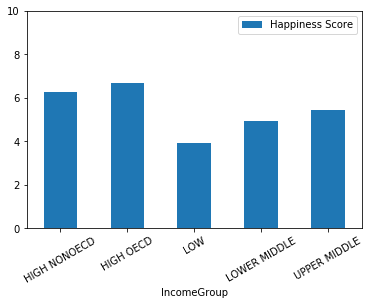

In [74]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper() 
pv_incomes = merged.pivot_table(index='IncomeGroup', values='Happiness Score')
pv_incomes.plot(kind='bar', rot=30, ylim=(0, 10))
plt.show()